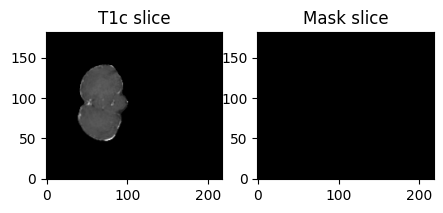

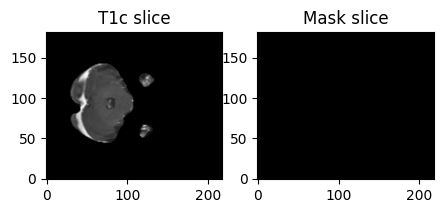

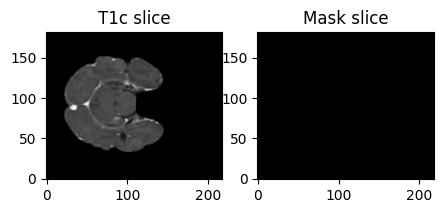

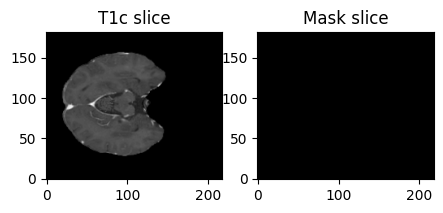

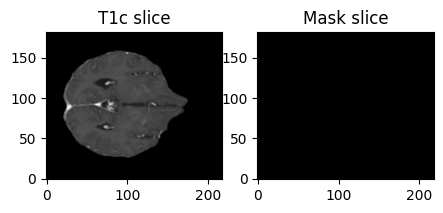

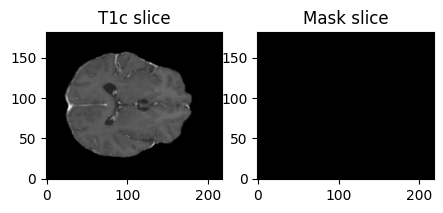

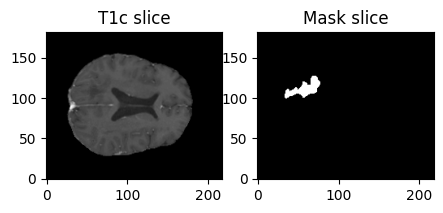

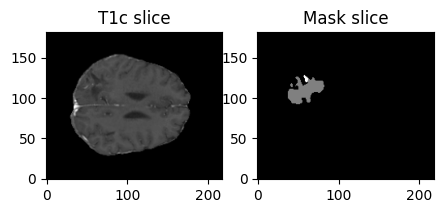

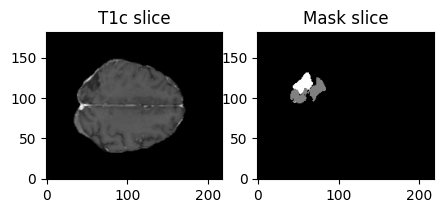

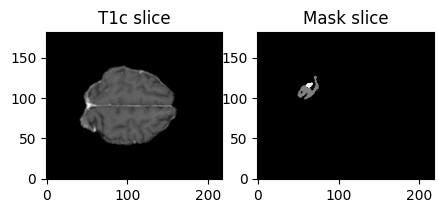

In [14]:
import os
from pathlib import Path
from monai.transforms import (
    Compose,
    LoadImaged,
    EnsureChannelFirstd,
    ScaleIntensityd
)
from monai.data import DataLoader, Dataset
import matplotlib.pyplot as plt

# Define the path to the data directory
root_directory = Path().resolve().parent                            # Main project directory
data_directory = root_directory / 'data' / 'raw' / 'training_data'  # Data directory

# List all subfolders in the data directory
folders = [f for f in data_directory.iterdir() if f.is_dir()]

# Select the first folder for example
first_folder = folders[0]

# Define the paths to the image and mask files
image_files = {
    't1c': str(first_folder / f'{first_folder.name}-t1c.nii.gz'),
    'seg': str(first_folder / f'{first_folder.name}-seg.nii.gz')
}

# Create a list of files to process
files = [{'image': image_files['t1c'], 'label': image_files['seg']}]

# Define the transformations
transforms = Compose([
    LoadImaged(keys=['image', 'label']),
    EnsureChannelFirstd(keys=['image', 'label']),
    ScaleIntensityd(keys=['image'])
])

# Create a dataset and dataloader
dataset = Dataset(data=files, transform=transforms)
loader = DataLoader(dataset, batch_size=1)

# Load a sample batch
batch = next(iter(loader))

# Extract image and label data
image = batch['image'][0][0]  # [batch, channel, height, width, depth]
label = batch['label'][0][0]


# Display the image and corresponding mask
def plot_slices(slice_idx, image, label):
    plt.figure(figsize=(5, 2))
    plt.subplot(1, 2, 1)
    plt.imshow(image[:, :, slice_idx], cmap='gray', origin='lower')
    plt.title('T1c')

    plt.subplot(1, 2, 2)
    plt.imshow(label[:, :, slice_idx], cmap='gray', origin='lower')
    plt.title('Mask')

    plt.show()

for i in range(50, image.shape[2]-40, 10):
    plot_slices(i, image, label)